# 1. Redução das das amostras 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import random

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from tensorflow.keras import layers, models

from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

In [ ]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

In [ ]:
def clean_data(data):
    #data = read_instance(data)
    #retirando a coluna de nomes, local de embarque, tarifa do passageiro, 
    #numero do ticket 
    data = data.drop(columns=['Name'])
    data = data.drop(columns=['Ticket'])
    data = data.drop(columns=['Fare'])
    data = data.drop(columns=['Embarked'])
    # escolher se tirar cabine ou não pois a cabine infere no setor do barco
    data = data.drop(columns=['Cabin'])
    data = data.dropna()
    #trocando valores de male e female por 1 e 0
    data.loc[data.Sex=='male','Sex'] = 1
    data.loc[data.Sex=='female','Sex'] = 0
    return data

In [ ]:
data = read_instance('train.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


% de mulheres sobreviventes: 0.7420382165605095
% de mulheres sobreviventes: 0.18890814558058924


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

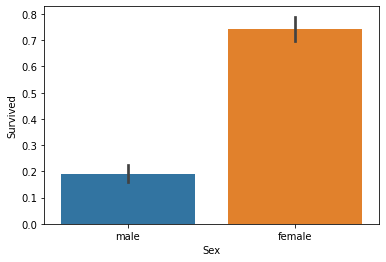

In [ ]:
#quem tem mais chance de soobrevivencia?
mulher = data.loc[data.Sex == 'female']["Survived"]
m_sobrevivente = sum(mulher)/len(mulher)

print("% de mulheres sobreviventes:", m_sobrevivente )

homem = data.loc[data.Sex == 'male']["Survived"]
h_sobrevivente = sum(homem)/len(homem)

print("% de mulheres sobreviventes:", h_sobrevivente )

sns.barplot(x="Sex", y="Survived", data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

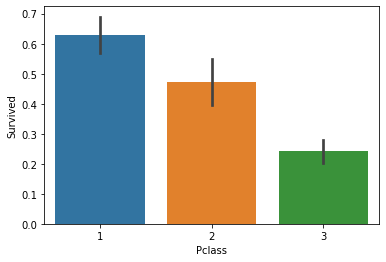

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

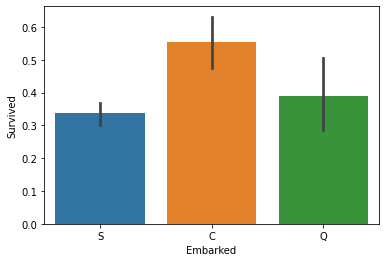

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

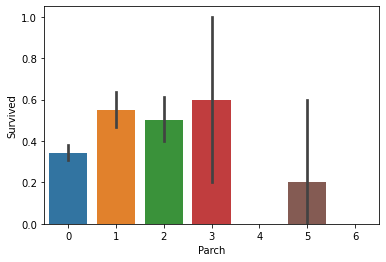

In [ ]:
sns.barplot(x="Parch", y="Survived", data=data)

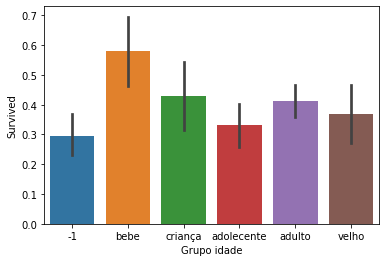

In [ ]:
data["Age"] = data["Age"].fillna(-0.5)
bins = [-1, 0, 12, 18, 25, 45, np.inf]
labels = ['-1', 'bebe', 'criança', 'adolecente', 'adulto', 'velho']
data['Grupo idade'] = pd.cut(data["Age"], bins, labels = labels)

sns.barplot(x="Grupo idade", y="Survived", data=data)
plt.show()

In [ ]:
data = clean_data(data)

In [ ]:
data = data.drop(columns=['Grupo idade'])

In [ ]:
display(data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,-0.5,1,2
889,890,1,1,1,26.0,0,0


In [ ]:
data_test = read_instance('test.csv')
data_test = clean_data(data_test)
display(data_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1
411,1303,1,0,37.0,1,0
412,1304,3,0,28.0,0,0
414,1306,1,0,39.0,0,0


## Treino

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,-0.5,1,2
889,890,1,1,1,26.0,0,0


In [ ]:
x,y = data.drop(columns=['Survived']), data['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
model = MLPClassifier(activation='logistic', max_iter=10000,solver ='adam',hidden_layer_sizes = (100))
model.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=10000)

In [ ]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       160
           1       0.85      0.65      0.74       108

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



# **Questão 2 - MNIST**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(Y_train)

[5 0 4 ... 5 6 8]


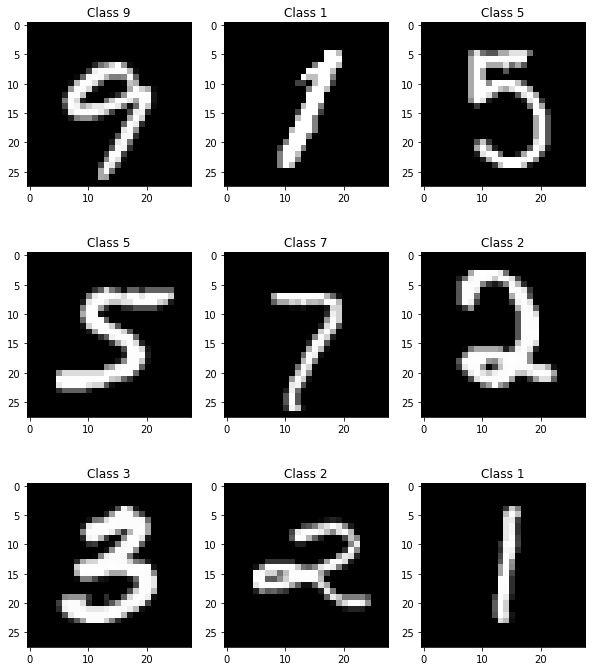

In [ ]:
plt.figure(figsize=(10, 12))

for i in range (0, 9):
   plt.subplot(3, 3, i+1)
   num = random.randint(0, len(X_train))
   plt.imshow(X_train[num], cmap='gray')
   plt.title("Class {}".format(Y_train[num]))

plt.show()

## **Modelo Perceptron clássico**

In [ ]:
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
print('Treino: ', X_train.shape, 'Teste: ', X_test.shape)

Treino:  (60000, 28, 28) Teste:  (10000, 28, 28)


In [ ]:
#  60,000 matrizes 28 x 28 em 60,000 vetores de tamanho: 784

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print('Treino: ', X_train.shape, 'Teste: ', X_test.shape)

Treino:  (60000, 784) Teste:  (10000, 784)


In [ ]:
# Normalização
X_train = X_train/255
X_test = X_test/255

In [ ]:
dummy = OneHotEncoder(sparse = False)

Y_train_hot = dummy.fit_transform(Y_train)
Y_test_hot = dummy.fit_transform(Y_test)


In [ ]:
Y_train_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
input_dim = X_train.shape[1]
output_dim = 10

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(200, activation='relu', input_dim = input_dim),
        BatchNormalization(),
        Dropout(0.25),

        keras.layers.Dense(100, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
                
        keras.layers.Dense(50, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        keras.layers.Dense(output_dim, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, Y_train_hot, epochs = 30, validation_data = (X_test, Y_test_hot))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4248 - accuracy: 0.8726 - val_loss: 0.1602 - val_accuracy: 0.9491
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2292 - accuracy: 0.9327 - val_loss: 0.1136 - val_accuracy: 0.9657
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1906 - accuracy: 0.9435 - val_loss: 0.0897 - val_accuracy: 0.9723
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1680 - accuracy: 0.9508 - val_loss: 0.0875 - val_accuracy: 0.9741
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1454 - accuracy: 0.9560 - val_loss: 0.0723 - val_accuracy: 0.9776
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1392 - accuracy: 0.9581 - val_loss: 0.0769 - val_accuracy: 0.9757
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1286 - accuracy: 0.9617 - val_loss: 0.0697 - val_accuracy:

## **Erro e validação**

In [ ]:
vl = history.history['val_loss']
tl = history.history['loss']

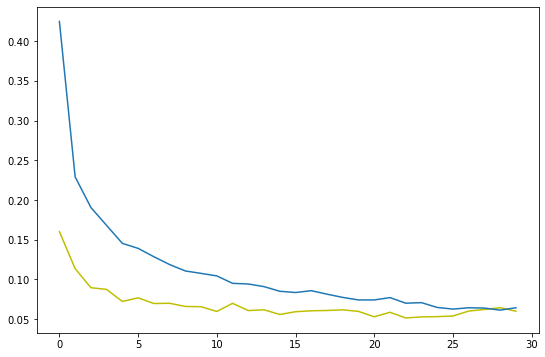

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(vl, color = 'y') # amarelo
plt.plot(tl)

In [ ]:
score = model.evaluate(X_test, Y_test_hot) # [loss_test, acc_test]
score2 = model.evaluate(X_train, Y_train_hot)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9966


In [ ]:
print('Acurácia treino: ', score2[1])
print('Acurácia Teste: ', score[1])

Acurácia treino:  0.9966333508491516
Acurácia Teste:  0.9822999835014343


## **Matriz de confusão Perceptron**

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(np.argmax(Y_pred, axis=1), np.argmax(Y_test_hot, axis=1) ))

[[ 976    0    2    0    1    3    5    1    3    3]
 [   0 1126    0    0    0    0    2    3    0    2]
 [   1    3 1015    2    3    0    1    8    2    0]
 [   0    1    4  998    0   13    1    1    4    6]
 [   0    0    2    0  958    1    3    0    3    9]
 [   1    1    0    2    0  866    3    0    1    1]
 [   0    1    0    0    5    3  942    0    0    0]
 [   1    1    7    2    2    1    0 1008    5    4]
 [   1    2    2    2    1    2    1    1  953    3]
 [   0    0    0    4   12    3    0    6    3  981]]


In [ ]:
print(classification_report(np.argmax(Y_pred, axis=1), np.argmax(Y_test_hot, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       994
           1       0.99      0.99      0.99      1133
           2       0.98      0.98      0.98      1035
           3       0.99      0.97      0.98      1028
           4       0.98      0.98      0.98       976
           5       0.97      0.99      0.98       875
           6       0.98      0.99      0.99       951
           7       0.98      0.98      0.98      1031
           8       0.98      0.98      0.98       968
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## **Rede Neural Convolucional**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Redefinindo o formato
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Normalização
X_train = X_train/255
X_test = X_test/255

In [ ]:

dummy = OneHotEncoder(sparse = False)

Y_train_hot = dummy.fit_transform(Y_train.reshape(-1, 1))
Y_test_hot = dummy.fit_transform(Y_test.reshape(-1, 1))

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape = (28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax"), # numero de classes
    ]
)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train_hot, batch_size = 32, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2499 - accuracy: 0.9221 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0904 - accuracy: 0.9716 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 5/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0518 - accuracy: 0.9847 - val_loss: 0.0389 - val_accuracy: 0.9895
Epoch 6/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 7/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 0.0358 -

## **Erro e validação**

In [ ]:
score = model.evaluate(X_train, Y_train_hot, verbose=0)
print("Erro Treino:", score[0])
print("Acurácia treino:", score[1])

Erro Treino: 0.018389640375971794
Acurácia treino: 0.994350016117096


In [ ]:
score = model.evaluate(X_test, Y_test_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.028995126485824585
Test accuracy: 0.9904000163078308


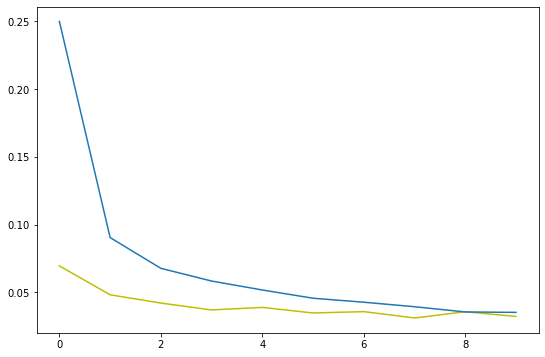

In [ ]:
vl = history.history['val_loss']
tl = history.history['loss']

plt.figure(figsize=(9, 6))
plt.plot(vl, color = 'y')
plt.plot(tl)

## **Matriz de confusão**

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(np.argmax(Y_pred, axis=1), np.argmax(Y_test_hot, axis=1)))

[[ 977    0    1    0    0    1    4    0    3    1]
 [   0 1130    0    0    0    0    2    2    0    0]
 [   1    3 1027    3    0    0    1   10    1    1]
 [   0    1    0 1004    0    4    0    1    1    0]
 [   0    0    0    0  970    0    1    0    1    2]
 [   0    0    0    2    0  885    5    1    2    6]
 [   0    1    0    0    2    1  944    0    0    0]
 [   1    0    4    0    0    0    0 1011    0    4]
 [   1    0    0    1    2    0    1    1  962    1]
 [   0    0    0    0    8    1    0    2    4  994]]


In [ ]:
print(classification_report(np.argmax(Y_pred, axis=1), np.argmax(Y_test_hot, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       987
           1       1.00      1.00      1.00      1134
           2       1.00      0.98      0.99      1047
           3       0.99      0.99      0.99      1011
           4       0.99      1.00      0.99       974
           5       0.99      0.98      0.99       901
           6       0.99      1.00      0.99       948
           7       0.98      0.99      0.99      1020
           8       0.99      0.99      0.99       969
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Questão 3

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def tratament_images(image):
    raw = np.array(image, dtype = float) / 255.0
    images = raw.reshape([-1, 3, 32, 32]) # transformar em uma matriz pra plotar a imagem
    images = images = images.transpose([0, 2, 3, 1]) # ajeita as colunas pra montar a imagem
    return images


def carregar_data(file):
    data = unpickle(file)
    images_array = data[b'data']
    images = tratament_images(images_array)

    labels = np.array(data[b'labels'])

    return images, labels

def test():
    images_, labels_ = carregar_data(f'/content/drive/MyDrive/cifar-10-batches-py/test_batch')

    return images_, labels_

def train():
    images = np.zeros(shape=[50000, 32, 32, 3], dtype = float)
    labels = np.zeros(shape=[50000], dtype = int)

    ponteiro_final = 0

    for i in range(5):
        images_, labels_ = carregar_data(f'/content/drive/MyDrive/cifar-10-batches-py/data_batch_{i+1}')
    
        final = ponteiro_final + 10000
        images[ponteiro_final:final,:] = images_
        labels[ponteiro_final:final] = labels_

        ponteiro_final = final

    return images, labels

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = unpickle(f'/content/drive/MyDrive/cifar-10-batches-py/batches.meta')
data

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [5]:
name_labels = ['avião','carro','passaro','gato','viado','cachorro','sapo','cavalo','barco','caminhão']
X_train, y_train = train()
X_test, y_test = test()
classe_one_hot_train = np_utils.to_categorical(y_train,10)
classe_one_hot_test = np_utils.to_categorical(y_test,10)

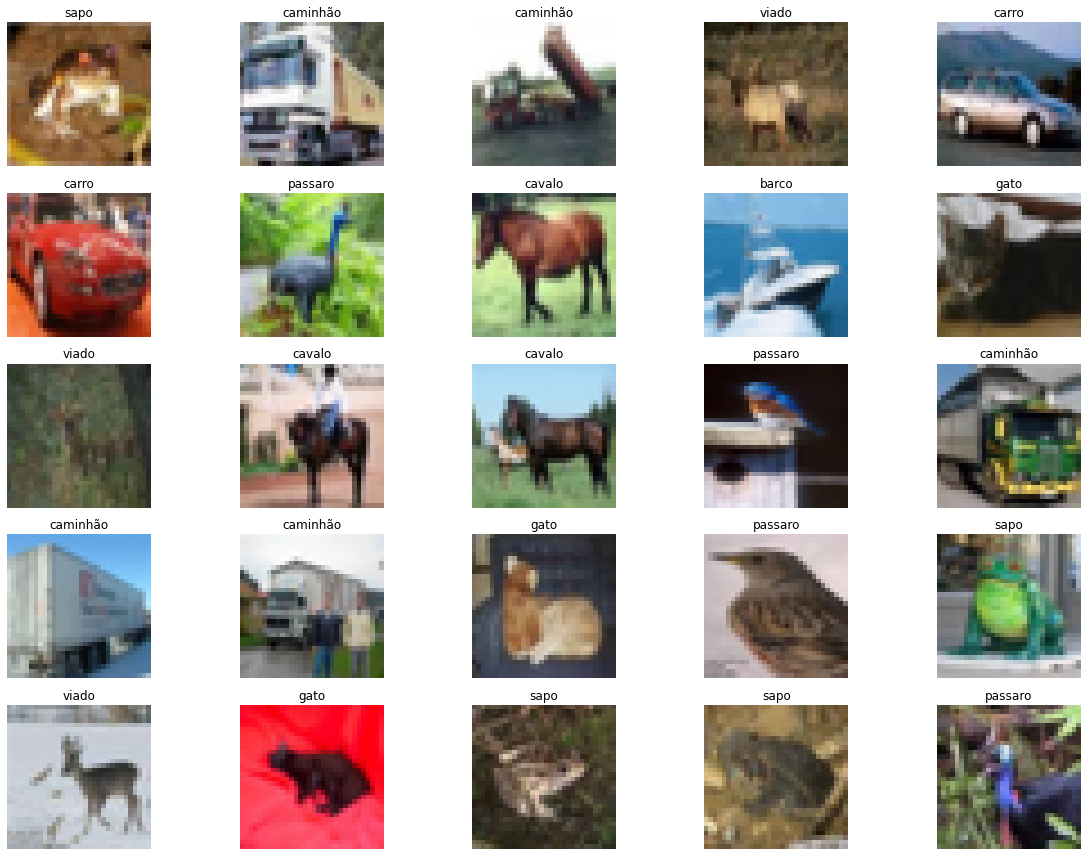

In [6]:
W_grid = 5
L_grid = 5
axes = []
fig = plt.figure(figsize=(17,12))

for a in range(W_grid*L_grid):
    axes.append( fig.add_subplot(W_grid, L_grid, a+1) )
    subplot_title = (str(name_labels[y_train[a]]))
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    plt.imshow(X_train[a])
fig.tight_layout()

In [34]:
cnn = models.Sequential()


cnn.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape=(32,32,3)))

cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(128, (3,3), activation = 'relu'))
cnn.add(layers.Conv2D(96, (3,3), activation = 'relu'))
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(Dropout(0.5))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu'))

#vetorização
cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

#10 neuronios de saida por causa das 10 classes
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 96)        110688    
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 64)          55360     
                                                                 
 dropout_2 (Dropout)         (None, 9, 9, 64)          0         
                                                      

In [35]:
cnn.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-4),
            metrics = ['accuracy'])

In [36]:
epochs = 200
history = cnn.fit(X_train, classe_one_hot_train, batch_size = 256, epochs = epochs,validation_data=(X_test,classe_one_hot_test))

Epoch 1/200
196/196 [==============================] - 7s 34ms/step - loss: 2.1267 - accuracy: 0.1834 - val_loss: 1.9208 - val_accuracy: 0.2966
Epoch 2/200
196/196 [==============================] - 6s 33ms/step - loss: 1.8213 - accuracy: 0.3201 - val_loss: 1.7751 - val_accuracy: 0.3266
Epoch 3/200
196/196 [==============================] - 6s 33ms/step - loss: 1.7151 - accuracy: 0.3577 - val_loss: 1.6687 - val_accuracy: 0.3814
Epoch 4/200
196/196 [==============================] - 6s 33ms/step - loss: 1.6324 - accuracy: 0.3917 - val_loss: 1.5910 - val_accuracy: 0.4196
Epoch 5/200
196/196 [==============================] - 7s 33ms/step - loss: 1.5613 - accuracy: 0.4213 - val_loss: 1.5169 - val_accuracy: 0.4478
Epoch 6/200
196/196 [==============================] - 7s 33ms/step - loss: 1.5209 - accuracy: 0.4410 - val_loss: 1.4784 - val_accuracy: 0.4516
Epoch 7/200
196/196 [==============================] - 7s 34ms/step - loss: 1.4593 - accuracy: 0.4630 - val_loss: 1.4292 - val_accuracy:

In [37]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)
y_test = np.argmax(classe_one_hot_test, axis=1)

print(classification_report(y_test, y_pred))
print('matriz de confusão')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.85      0.91      0.88      1000
           2       0.74      0.71      0.73      1000
           3       0.66      0.61      0.63      1000
           4       0.78      0.77      0.78      1000
           5       0.67      0.77      0.71      1000
           6       0.79      0.87      0.83      1000
           7       0.81      0.84      0.82      1000
           8       0.91      0.79      0.85      1000
           9       0.90      0.81      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

matriz de confusão
[[826  21  44  16  12   7  13  20  27  14]
 [ 16 906   6   8   2   4  10   2  12  34]
 [ 45   6 709  53  52  56  50  25   3   1]
 [  9   4  51 609  46 178  60  36   5   2]
 [ 10   1  39  43 774  38  50  41   3   1]
 [  4  

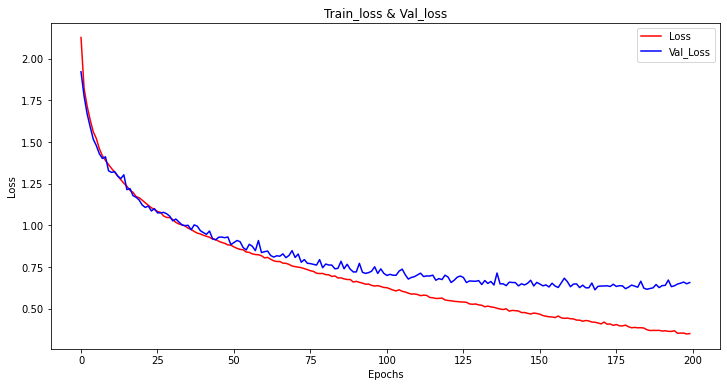

In [38]:
plt.figure(figsize=(12,6))
plt.title('Train_loss & Val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='red', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()